# Feature Engineering

- **Age** dervied from `date_of_birth` subtracted from the date at which the datapoint were collected
- **Fitness**: (BMI) calculated from height and weight, better than either of them individually
- **Productivity**: Number of publications over number of years, might be more helpful than publication count or years in company individually

### Feature Combination

In [1]:
import pandas as pd

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


#### New Feature: Density

In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


#### New Feature: BMI

In [2]:
import pandas as pd

humans = pd.read_csv('../datasets/nba/SOCR-HeightWeight.csv')
humans.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
# convert height and weight to scientific units
humans['Height'] = humans['Height(Inches)'] * 0.0254
humans['Weight'] = humans['Weight(Pounds)'] * 0.453592

In [4]:
humans['BMI'] = humans['Weight'] / (humans['Height'] ** 2)

In [5]:
humans.head()

,Index,Height(Inches),Weight(Pounds),Height,Weight,BMI
0,1,65.78331,112.9925,1.670896,51.252494,18.357609
1,2,71.51521,136.4873,1.816486,61.909547,18.762615
2,3,69.39874,153.0269,1.762728,69.411778,22.338940
3,4,68.21660,142.3354,1.732702,64.562199,21.504569
4,5,67.78781,144.2971,1.721810,65.452010,22.077625


In [6]:
humans.drop(['Height(Inches)', 'Weight(Pounds)'], axis=1, inplace=True)

<Axes: ylabel='Frequency'>

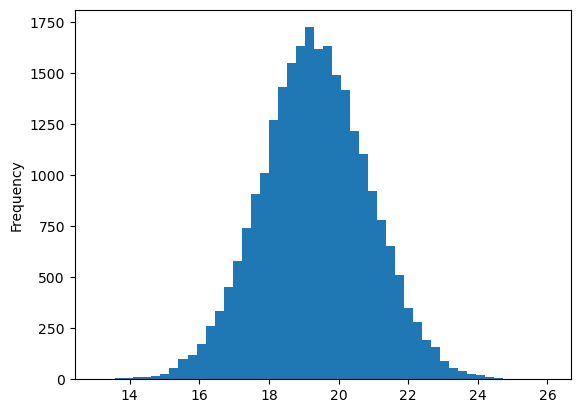

In [7]:
humans['BMI'].plot.hist(bins=50)

In [8]:
# If your BMI is less than 18.5, it falls within the underweight range.
# If your BMI is 18.5 to <25, it falls within the healthy weight range.
# If your BMI is 25.0 to <30, it falls within the overweight range.
# If your BMI is 30.0 or higher, it falls within the obesity range.

def fitness(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'healthy'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

humans['Fitness'] = humans['BMI'].apply(fitness)

<Axes: xlabel='Fitness'>

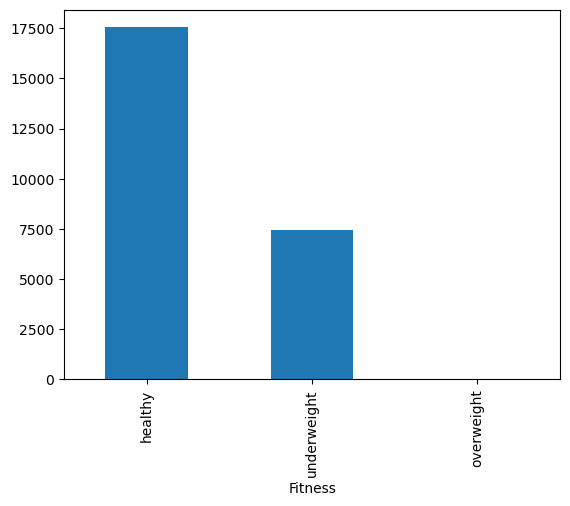

In [9]:
# Plot humans distribution across fitness class
humans['Fitness'].value_counts().plot(kind='bar')

#### You are not limited to the dataset

You are not limited to the dataset given to you. Example: let's say the data have number of hotels and the country. And we want to create a feature to represent how **Touristy** a country is. The number of hotels alone isn't a good indicator, when comparing two countries of different size or populations. Hence, we first fetch population of the country from an API, add it to our dataset, and create our new feature.

Remember that Wrangling, Exploration, and Feature Engineering are iterative. Meaning, that you may want to explore engineered features after the exploration phase on the initial data.